<a href="https://colab.research.google.com/github/vunnampragathi/financial-data-science/blob/main/690assignment_5_pragathi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Due Data: Dec. 1st

# Assignment 5

In this assignment, you are required to pick 2 machine learning models of your choice and then apply it to model the credit risk using `German Credit Risk`data. Do not forget to explain/interpret the steps you follow.

In [1]:
# codes here
import pandas as pd
credit = pd.read_csv('/content/credit_data_risk(1) (1).csv')
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [2]:
credit['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [3]:
del credit['Unnamed: 0']

In [4]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [5]:
import matplotlib.pyplot as plt
numerical_credit = credit.select_dtypes(exclude='O')

In [6]:
numerical_credit

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


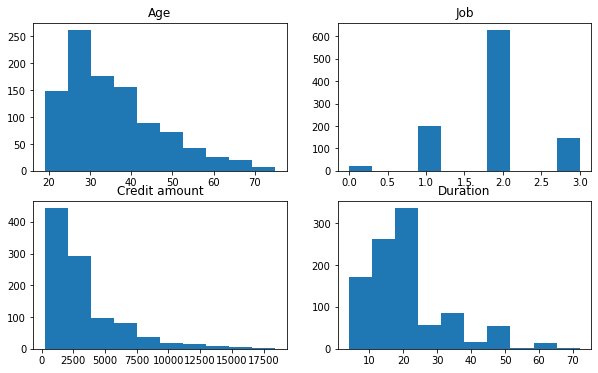

In [7]:
plt.figure(figsize=(10, 6))
k = 0
for i, j in enumerate(numerical_credit):
    k+=1
    plt.subplot(2,2,k)
    plt.hist(numerical_credit.iloc[:,i])
    plt.title(str(j))

In [8]:

numerical_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1000 non-null   int64
 1   Job            1000 non-null   int64
 2   Credit amount  1000 non-null   int64
 3   Duration       1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [10]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [11]:
distance = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

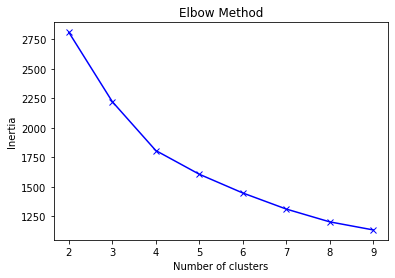

In [12]:
no_cluster = range(2, 10)
plt.plot(no_cluster, distance, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=2)
cluster = kmeans.fit_predict(scaled_credit)

In [14]:
credit['clusters'] = pd.DataFrame(kmeans.labels_)

In [15]:
credit.head()# risk variable is the ground truth

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,clusters
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1
4,53,male,2,free,little,little,4870,24,car,bad,0


In [16]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']

In [17]:
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit Amount', 'Duration', 'Clusters', 'Risk']

In [18]:
df_scaled.head()

,Age,Job,Credit Amount,Duration,Clusters,Risk
0,2.766456,0.146949,-0.745131,-1.236478,0,good
1,-1.191404,0.146949,0.949817,2.248194,1,bad
2,1.183312,-1.383771,-0.416562,-0.738668,0,good
3,0.831502,0.146949,1.634247,1.750384,1,good
4,1.535122,0.146949,0.566664,0.256953,0,bad


In [19]:
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts()

good    576
bad     195
Name: Risk, dtype: int64

In [20]:
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts()

good    124
bad     105
Name: Risk, dtype: int64

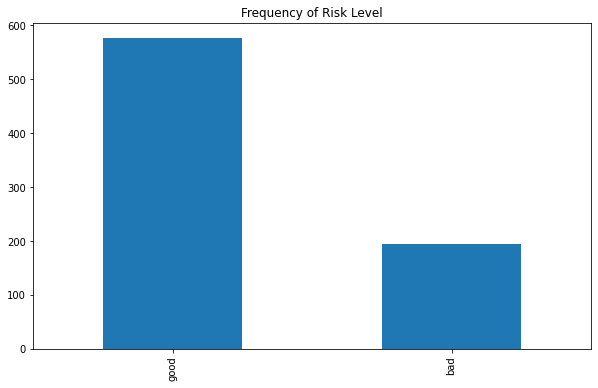

In [21]:
df_scaled[df_scaled.Clusters==0]['Risk'].value_counts().\
plot(kind='bar',figsize=(10, 6),title='Frequency of Risk Level');

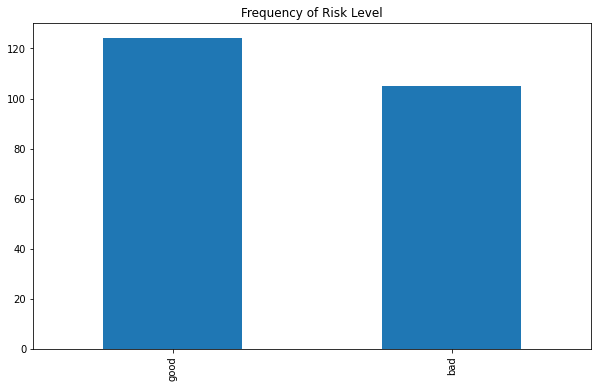

In [22]:
df_scaled[df_scaled.Clusters==1]['Risk'].value_counts().\
plot(kind='bar',figsize=(10, 6),title='Frequency of Risk Level');

In [23]:
credit['clusters'].value_counts()# 0: good and 1: bad

0    771
1    229
Name: clusters, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good':0, 'bad':1})

In [26]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:,['Risk','Clusters']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,Age,Job,Credit Amount,Duration,Clusters
29,2.414647,0.146949,1.263499,3.243815,1
535,-0.223927,0.146949,-0.337522,0.008048,0
695,1.271265,0.146949,-0.721384,-1.236478,0
557,-0.575737,0.146949,0.613804,0.008048,0
836,-1.279356,0.146949,-0.845439,-0.738668,0
...,...,...,...,...,...
106,0.303788,1.677670,1.129520,-0.240857,1
270,-0.311879,0.146949,-0.215947,-0.240857,0
860,-0.751642,0.146949,0.897714,0.256953,1
435,-0.927547,0.146949,-0.633482,-0.738668,0


In [29]:
first_cluster_train = X_train[X_train.Clusters==0].iloc[:,:-1]
second_cluster_train = X_train[X_train.Clusters==1].iloc[:,:-1]

In [30]:
import statsmodels.api as sm
from imblearn.combine import SMOTEENN
from sklearn.metrics import roc_auc_score, roc_curve

In [31]:
X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters==0]['Risk']

In [32]:
smote = SMOTEENN(random_state=2)
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel())

In [33]:
first_cluster_test = X_test[X_test.Clusters==0].iloc[:,:-1]
second_cluster_test = X_test[X_test.Clusters==1].iloc[:,:-1]

In [39]:
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters==0]['Risk']

## Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
# entropy means information gain
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
dt.fit(X_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
y_pred_dt1 = dt.predict(X_test1)

In [43]:
accuracy_score(y_pred_dt1,y_test1)

0.5609756097560976

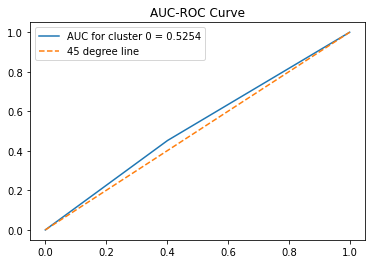

In [52]:
false_pos, true_pos, _ = roc_curve(y_test1.values, y_pred_dt1)
auc = roc_auc_score(y_test1, y_pred_dt1)
plt.plot(false_pos, true_pos, label='AUC for cluster 0 = {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()


In [47]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters==1]['Risk']

In [48]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters==1]['Risk']

In [49]:
dt.fit(X_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
y_pred_dt2 = dt.predict(X_test2)

In [51]:
accuracy_score(y_pred_dt2,y_test2)

0.3888888888888889

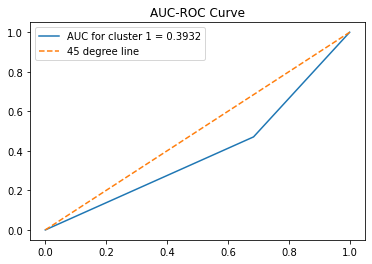

In [54]:
false_pos, true_pos, _ = roc_curve(y_test2.values, y_pred_dt2)
auc = roc_auc_score(y_test2, y_pred_dt2)
plt.plot(false_pos, true_pos, label='AUC for cluster 1 = {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()

## KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

In [70]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train1,y_train1)
    score = metrics.accuracy_score(y_test1, neigh.predict(X_test1))
    if score > max_score:
        max_k = k
        max_score = score

In [71]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 2  to get the best prediction, then the average accuracy is  0.5487804878048781


In [72]:
kn1 = KNeighborsClassifier(n_neighbors=2)
kn1.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=2)

In [73]:
y_pred_kn1 = kn1.predict(X_test1)

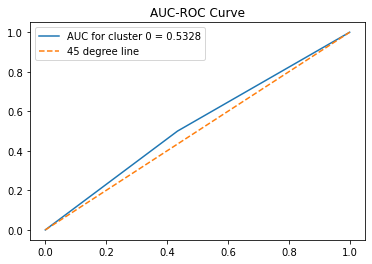

In [74]:
false_pos, true_pos, _ = roc_curve(y_test1.values, y_pred_kn1)
auc = roc_auc_score(y_test1, y_pred_kn1)
plt.plot(false_pos, true_pos, label='AUC for cluster 0 = {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()


In [75]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train2,y_train2)
    score = metrics.accuracy_score(y_test2, neigh.predict(X_test2))
    if score > max_score:
        max_k = k
        max_score = score

In [76]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 19  to get the best prediction, then the average accuracy is  0.75


In [77]:
kn2 = KNeighborsClassifier(n_neighbors=19)
kn2.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=19)

In [78]:
y_pred_kn2 = kn2.predict(X_test2)

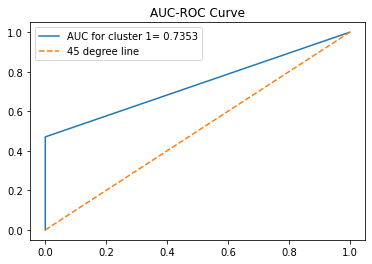

In [79]:
false_pos, true_pos, _ = roc_curve(y_test2.values, y_pred_kn2)
auc = roc_auc_score(y_test2, y_pred_kn2)
plt.plot(false_pos, true_pos, label='AUC for cluster 1= {:.4f}'.format(auc))
plt.plot([0,1], [0,1],linestyle='--', label='45 degree line')
plt.legend()
plt.title('AUC-ROC Curve')
plt.show()